In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [7]:
cd C:\Users\VRUTANT\Desktop

C:\Users\VRUTANT\Desktop


In [8]:
df=pd.read_csv("insurance.csv")

In [9]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [11]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [14]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [15]:
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [16]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

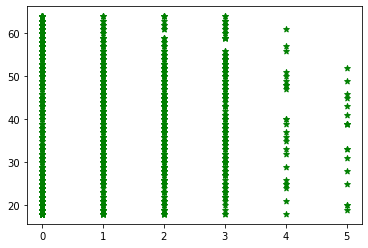

In [47]:
plt.scatter(df['children'],df['age'],color='green',marker='*')

<BarContainer object of 1338 artists>

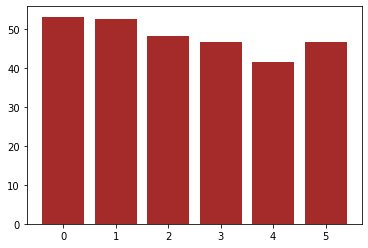

In [49]:
plt.bar(df['children'],df['bmi'],color='brown')

In [51]:
df=pd.get_dummies(df,drop_first=True)
df

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [57]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_s=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)
df_s.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,0.298584,-1.010519,1.970587,-0.566418,-0.611324,1.765481
1,-1.509965,0.509621,-0.078767,-0.953689,0.989591,-0.507463,-0.566418,1.635795,-0.566418
2,-0.797954,0.383307,1.580926,-0.728675,0.989591,-0.507463,-0.566418,1.635795,-0.566418
3,-0.441948,-1.305531,-0.908614,0.719843,0.989591,-0.507463,1.765481,-0.611324,-0.566418
4,-0.513149,-0.292556,-0.908614,-0.776802,0.989591,-0.507463,1.765481,-0.611324,-0.566418


In [60]:
x=df_s.drop('charges',axis=1)
y=df_s['charges']

In [62]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [63]:
x_train.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1261,-0.797954,1.055889,-0.078767,0.989591,-0.507463,-0.566418,-0.611324,1.765481
816,-1.082758,-1.056183,-0.908614,-1.010519,-0.507463,1.765481,-0.611324,-0.566418
581,-1.438764,-0.012040,-0.908614,0.989591,-0.507463,1.765481,-0.611324,-0.566418
1328,-1.153959,-1.056183,0.751079,-1.010519,-0.507463,-0.566418,-0.611324,-0.566418
492,-1.509965,-0.915925,-0.908614,-1.010519,-0.507463,-0.566418,-0.611324,-0.566418


In [66]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [67]:
model.score(x_train,y_train)

0.7430471855293476

In [68]:
model.score(x_test,y_test)

0.778109660422383

In [69]:
model.intercept_

0.005485111645327046

In [70]:
model.coef_

array([ 0.29810363,  0.17004374,  0.05503269, -0.01047124,  0.78872291,
        0.001995  , -0.03107932, -0.02995879])

In [75]:
pred=model.predict(x_test)
pred

array([-8.64769579e-01,  1.18818338e+00, -1.19236769e-01, -6.85568589e-01,
       -4.13880195e-01,  1.79336844e+00, -1.24631254e-01, -1.82131247e-01,
       -4.05207212e-01, -1.72624416e-01,  1.81553743e-01, -1.95750544e-01,
       -6.82300597e-01, -3.33179868e-01, -4.10884915e-01, -3.61792962e-01,
        1.51582675e+00, -2.66134358e-02,  1.49041303e-03, -4.74094229e-01,
        1.26703822e+00, -9.15123431e-01, -8.28292117e-01, -7.82744507e-01,
       -8.90524965e-01, -2.94618101e-01,  1.94706816e+00,  3.15902120e-01,
       -1.99178121e-01,  6.75121785e-02,  3.00710247e-03, -9.97635744e-01,
       -6.07054080e-01, -2.08166917e-01,  1.47684194e+00, -7.55407383e-01,
       -5.45543709e-01, -8.64421760e-01, -5.59540412e-01, -6.14822895e-01,
       -8.29584807e-01,  1.98064246e+00,  1.43216095e+00,  1.39690780e+00,
       -2.24690231e-01, -4.69029876e-01,  1.79569204e+00, -8.09640784e-01,
        4.79425209e-01, -6.58692117e-01, -2.38469928e-01,  1.26636390e+00,
       -7.94122504e-01, -

In [76]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [79]:
mse=mean_squared_error(y_test,pred)
mse

0.2298337146744918

In [80]:
r2_score(y_test,pred)

0.778109660422383

In [81]:
mean_absolute_error(y_test,pred)

0.3238463225214126

In [84]:
import math
rsme=math.sqrt(mse)
rsme

0.4794097565491255